# LinZShapedMF (Linear Z-shaped Membership Function)

The **Linear Z-shaped Membership Function** (`LinZShapedMF`) is a type of membership function in fuzzy logic that represents a smooth linear transition from a full degree of membership (**1.0**) to zero. Its shape is ideal for modeling concepts like "**cold**" or "**low**," where membership is high up to a certain point and then decreases linearly to zero.

## Parameters

The function is defined by two parameters that delimit the linear transition region:

  * **`a` (Left Shoulder):** The point where the membership value begins to transition from 1.0. For input values less than or equal to `a`, the membership is always 1.0.
  * **`b` (Right Foot):** The point where the membership value reaches and stays at zero. For input values greater than or equal to `b`, the membership is always 0.0.

It is crucial that the parameter `a` is **less than `b`** for the linear transition to occur correctly.

## Mathematical Formula

The formula for the `LinZShapedMF` is a piecewise linear function:

  * $\\mu(x) = 1$, for $x \\le a$
  * $\\mu(x) = \\frac{b - x}{b - a}$, for $a < x < b$
  * $\\mu(x) = 0$, for $x \\ge b$

Where $\\mu(x)$ is the degree of membership of element $x$ in the fuzzy set.

## Relationship with other Membership Functions

The `LinZShapedMF` is the **complement** of the linear S-shaped membership function (`LinSShapedMF`). This means that for a `LinZShapedMF` and a `LinSShapedMF` with the same parameters `a` and `b`, the relationship $\\mu\_{Z}(x) = 1 - \\mu\_{S}(x)$ is always true.

## Partial Derivatives (Gradients)

The partial derivatives are essential for optimizing the parameters `a` and `b` in adaptive fuzzy systems.

  * **Derivative with respect to `a` ($\\frac{\\partial \\mu}{\\partial a}$):**

    > $$\frac{\partial \mu}{\partial a} = \frac{b - x}{(b - a)^2}$$

  * **Derivative with respect to `b` ($\\frac{\\partial \\mu}{\\partial b}$):**

    > $$\frac{\partial \mu}{\partial b} = -\frac{x - a}{(b - a)^2}$$

### **Python Example and Visualization**

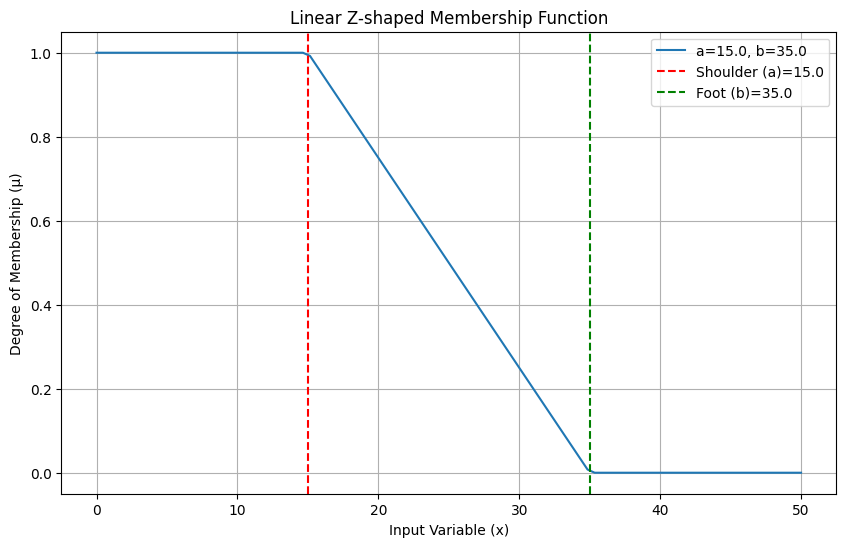

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class MembershipFunction:
    # Simplified base class for this example
    def __init__(self):
        self.parameters = {}
        self.gradients = {}
        self.last_input = None
        self.last_output = None
    
    def __call__(self, x: np.ndarray) -> np.ndarray:
        return self.forward(x)

class LinZShapedMF(MembershipFunction):
    """Linear Z-shaped Membership Function."""
    def __init__(self, a: float, b: float):
        super().__init__()
        if not (a < b):
            raise ValueError(f"Parameters must satisfy a < b, got a={a}, b={b}")
        self.parameters = {"a": float(a), "b": float(b)}
        self.gradients = {"a": 0.0, "b": 0.0}
        self.last_input = None
        self.last_output = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        x = np.asarray(x, dtype=float)
        self.last_input = x
        a, b = self.parameters["a"], self.parameters["b"]
        y = np.zeros_like(x, dtype=float)
        
        # Region to the left of the shoulder (x <= a)
        mask_left = x <= a
        y[mask_left] = 1.0

        # Transition ramp region (a < x < b)
        mask_mid = (x > a) & (x < b)
        if np.any(mask_mid):
            y[mask_mid] = (b - x[mask_mid]) / (b - a)

        # Region to the right of the foot (x >= b) remains 0
        self.last_output = y
        return y

    def backward(self, dL_dy: np.ndarray):
        if self.last_input is None or self.last_output is None:
            return
        x = self.last_input
        dL_dy = np.asarray(dL_dy)
        a, b = self.parameters["a"], self.parameters["b"]
        d = b - a
        if d == 0:
            return
        mask = (x > a) & (x < b)
        if not np.any(mask):
            return
        xm = x[mask]
        g = dL_dy[mask]
        
        dmu_da = (b - xm) / (d * d)
        dmu_db = -(xm - a) / (d * d)
        
        self.gradients["a"] += float(np.sum(g * dmu_da))
        self.gradients["b"] += float(np.sum(g * dmu_db))

# --- Start of visualization code ---

# 1. Create an instance of the membership function
#    This example creates a function that starts its transition at x=15 and ends at x=35.
mf = LinZShapedMF(a=15, b=35)

# 2. Generate a range of x values for the plot
#    We use np.linspace to create 100 uniformly spaced points between 0 and 50,
#    ensuring the curve is smooth.
x_values = np.linspace(0, 50, 100)

# 3. Compute the membership values (y) for each x
#    The forward() method applies the function to each value in the x_values array.
membership_values = mf.forward(x_values)

# 4. Configure and plot the chart
plt.figure(figsize=(10, 6))
plt.plot(x_values, membership_values, label=f'a={mf.parameters["a"]}, b={mf.parameters["b"]}')

# 5. Add vertical lines for the parameters 'a' and 'b'
#    These dashed lines help to visually mark where the transition begins (the 'Shoulder')
#    and where it ends (the 'Foot').
plt.axvline(mf.parameters['a'], color='r', linestyle='--', label=f'Shoulder (a)={mf.parameters["a"]}')
plt.axvline(mf.parameters['b'], color='g', linestyle='--', label=f'Foot (b)={mf.parameters["b"]}')

# 6. Add labels, title, and legend
#    These elements are essential for a clear and easily understood chart.
plt.title('Linear Z-shaped Membership Function')
plt.xlabel('Input Variable (x)')
plt.ylabel('Degree of Membership (μ)')
plt.legend()
plt.grid(True)
plt.show()